In [2]:
%run ../Data-Preprocessing.ipynb
%run ../U-Net.ipynb
%run ../Train-Eval-Utils.ipynb

import torchvision.transforms as transforms

from torch.utils.data import DataLoader, ConcatDataset

In [ ]:
convert_ct_dataset_to_slices('Task03_Liver', 'Liver_Train', 'Liver_Val', 'Liver_Test', val_split=0.15, test_split=0.15, negative_downsampling_rate=3, positive_downsampling_rate=2)

In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128), antialias=False),
    transforms.ConvertImageDtype(torch.float)
])

train_images = os.path.join('Liver_Train', 'images')
train_labels = os.path.join('Liver_Train', 'labels')

train_dataset = CTDataset(train_images, train_labels, image_transform=transform, label_transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

val_images = os.path.join('Liver_Val', 'images')
val_labels = os.path.join('Liver_Val', 'labels')

val_dataset = CTDataset(val_images, val_labels, image_transform=transform, label_transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

test_images = os.path.join('Liver_Test', 'images')
test_labels = os.path.join('Liver_Test', 'labels')

test_dataset = CTDataset(test_images, test_labels, image_transform=transform, label_transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = DiceLoss()

Epoch 1/30 started...
Training loss: 0.5122393641435323
Validation loss: 0.3101935598640761
...........................................
Epoch 2/30 started...
Training loss: 0.13744840790942253
Validation loss: 0.10262605934462288
...........................................
Epoch 3/30 started...
Training loss: 0.09464209678072583
Validation loss: 0.4042682762425315
...........................................
Epoch 4/30 started...
Training loss: 0.07208357243245589
Validation loss: 0.09124255529507433
...........................................
Epoch 5/30 started...
Training loss: 0.07024624258622356
Validation loss: 0.13383994366833354
...........................................
Epoch 6/30 started...
Training loss: 0.05997730386211497
Validation loss: 0.0782053089042089
...........................................
Epoch 7/30 started...
Training loss: 0.054929079908977524
Validation loss: 0.1740536664819119
...........................................
Epoch 8/30 started...
Training loss: 0

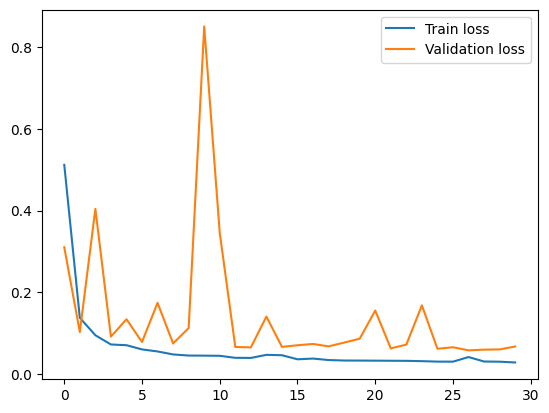

Best loss achieved on the validation set: 0.057615328283988285


In [5]:
model_1 = UNet(depth=3)
model_1.to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_1, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/30 started...
Training loss: 0.4054509115858553
Validation loss: 0.11180074319679867
...........................................
Epoch 2/30 started...
Training loss: 0.08758542078664933
Validation loss: 0.09396139647671368
...........................................
Epoch 3/30 started...
Training loss: 0.0785456956346373
Validation loss: 0.09866313031527786
...........................................
Epoch 4/30 started...
Training loss: 0.05723371713554266
Validation loss: 0.08114437877383691
...........................................
Epoch 5/30 started...
Training loss: 0.05517189895512957
Validation loss: 0.08185952602570026
...........................................
Epoch 6/30 started...
Training loss: 0.050804966368437725
Validation loss: 0.06840903439781157
...........................................
Epoch 7/30 started...
Training loss: 0.04597378850439956
Validation loss: 0.07280655585572311
...........................................
Epoch 8/30 started...
Training loss

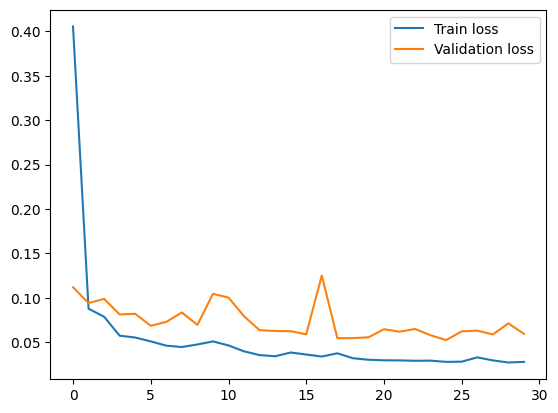

Best loss achieved on the validation set: 0.0523037040083977


In [6]:
model_2 = UNet(depth=5)
model_2.to(device)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_2, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/30 started...
Training loss: 0.4287348351944452
Validation loss: 0.16925376578853718
...........................................
Epoch 2/30 started...
Training loss: 0.1087712395465237
Validation loss: 0.11292999334415132
...........................................
Epoch 3/30 started...
Training loss: 0.07806977172920987
Validation loss: 0.11962539456379463
...........................................
Epoch 4/30 started...
Training loss: 0.06590373522933872
Validation loss: 0.0906991996026937
...........................................
Epoch 5/30 started...
Training loss: 0.061031316888743435
Validation loss: 0.09217008861038974
...........................................
Epoch 6/30 started...
Training loss: 0.06679213823486561
Validation loss: 0.1422637638686591
...........................................
Epoch 7/30 started...
Training loss: 0.05058051069120795
Validation loss: 0.07431128783206062
...........................................
Epoch 8/30 started...
Training loss: 

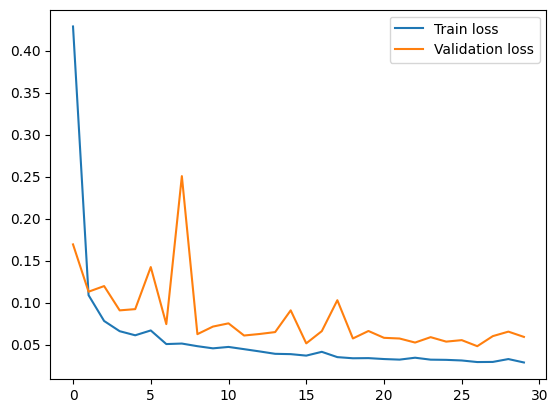

Best loss achieved on the validation set: 0.048041868908135964


In [7]:
model_3 = UNet(depth=7)
model_3.to(device)
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_3, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

In [8]:
train_val_concat_dataset = ConcatDataset([train_dataset, val_dataset])
train_val_concat_loader = DataLoader(train_val_concat_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

Epoch 1/50 started...
Training loss: 0.41483087535105445
...........................................
Epoch 2/50 started...
Training loss: 0.10007186559425003
...........................................
Epoch 3/50 started...
Training loss: 0.0712380452631077
...........................................
Epoch 4/50 started...
Training loss: 0.06635420349822647
...........................................
Epoch 5/50 started...
Training loss: 0.05565411628891225
...........................................
Epoch 6/50 started...
Training loss: 0.04952154796698998
...........................................
Epoch 7/50 started...
Training loss: 0.046400953298327566
...........................................
Epoch 8/50 started...
Training loss: 0.04600275396387239
...........................................
Epoch 9/50 started...
Training loss: 0.04366858423441306
...........................................
Epoch 10/50 started...
Training loss: 0.04629201313544964
.................................

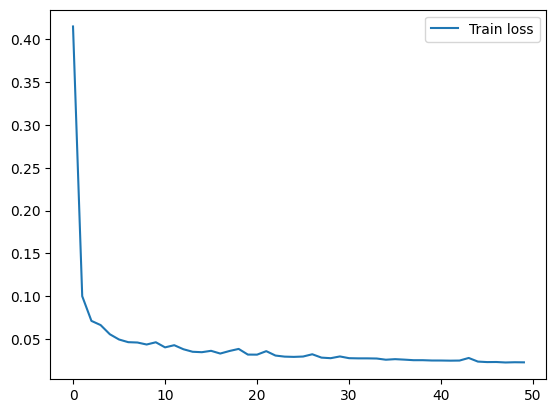

In [9]:
model_final = UNet(depth=7)
model_final.to(device)
optimizer = torch.optim.Adam(model_final.parameters(), lr=0.001)
best_model, best_loss = train_loop(model_final, 50, train_val_concat_loader, optimizer, criterion)

In [10]:
final_model_loss = evaluate(best_model, test_loader, criterion)
print(f'Final model loss: {final_model_loss}')

Final model loss: 0.06691144389126141


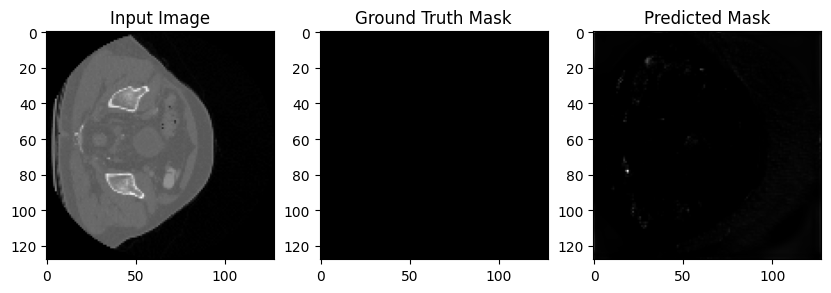

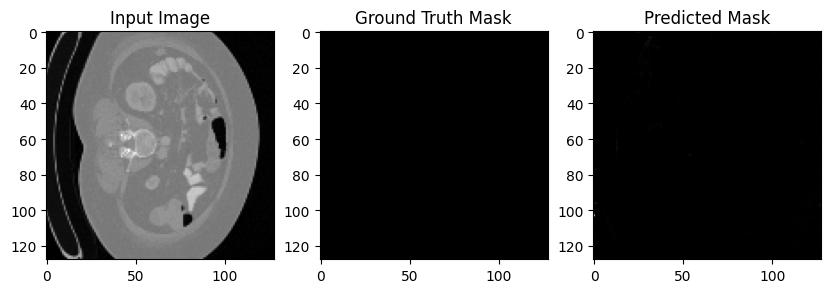

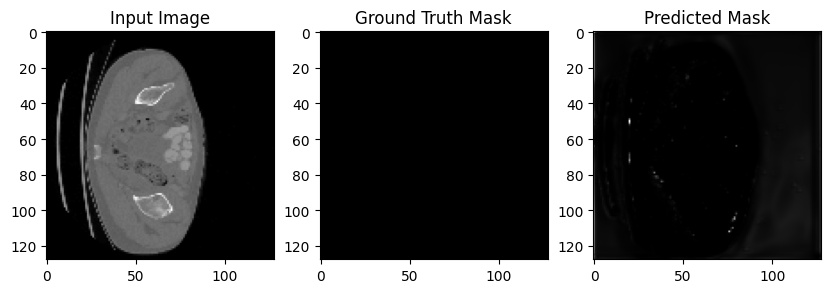

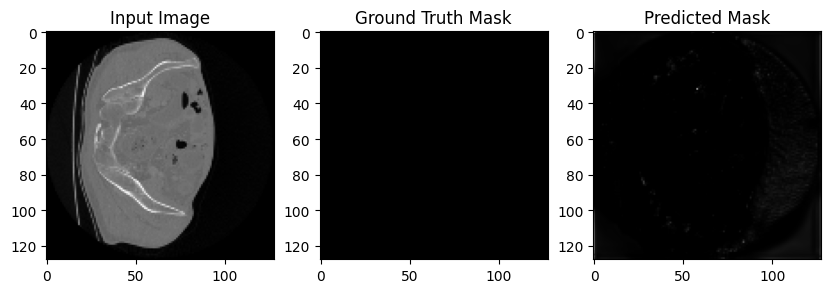

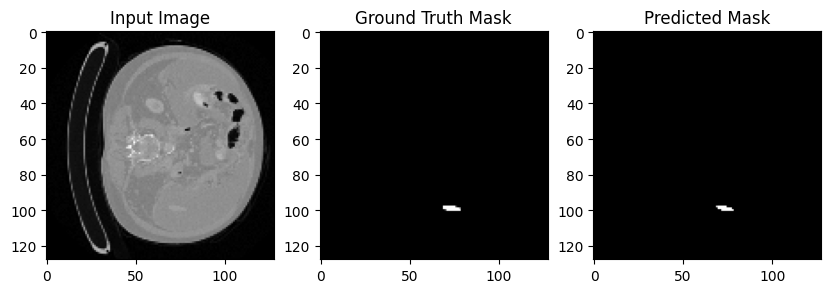

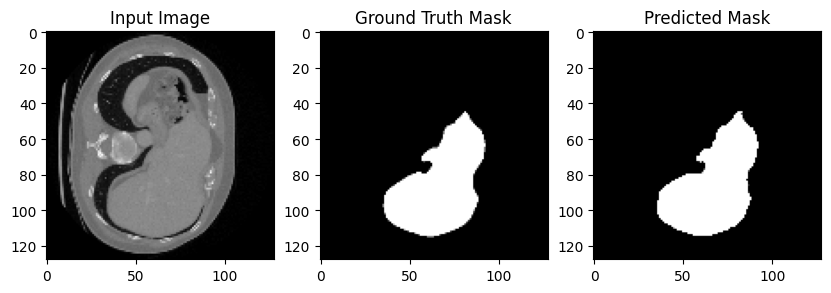

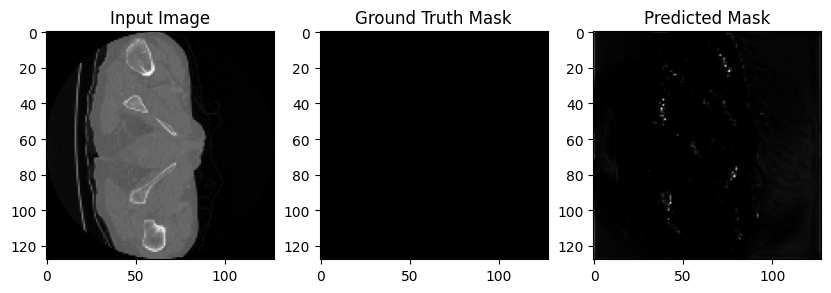

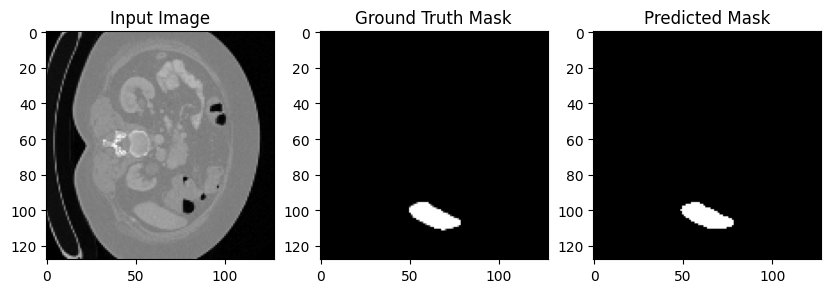

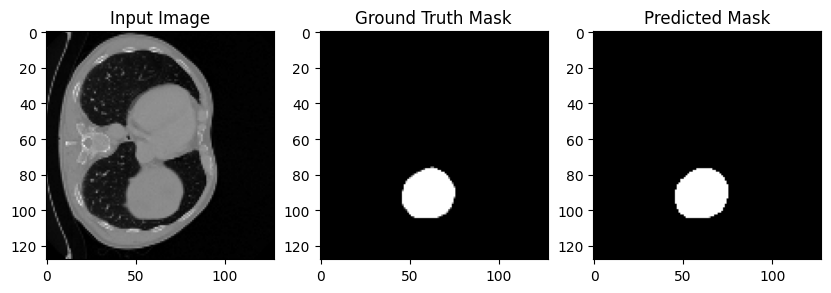

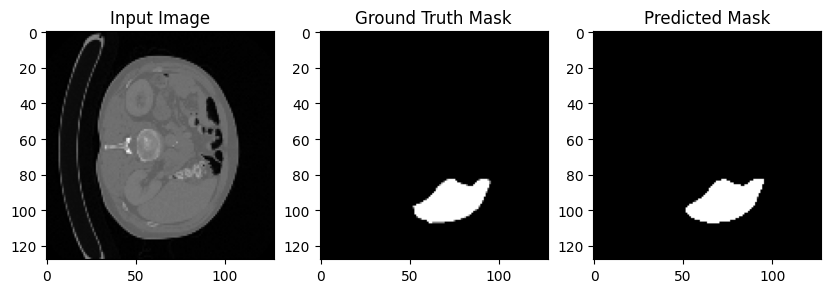

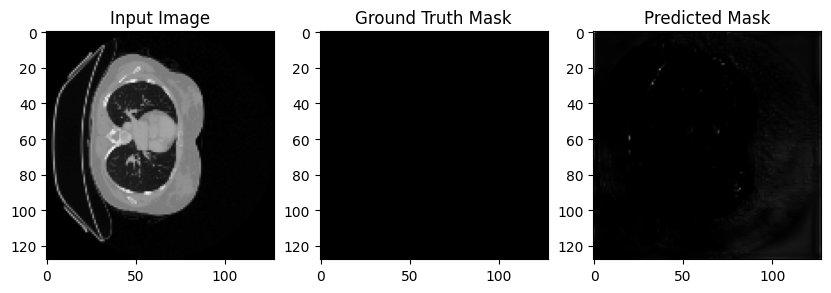

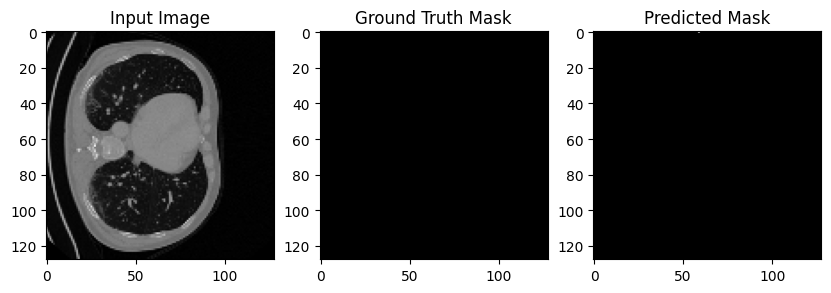

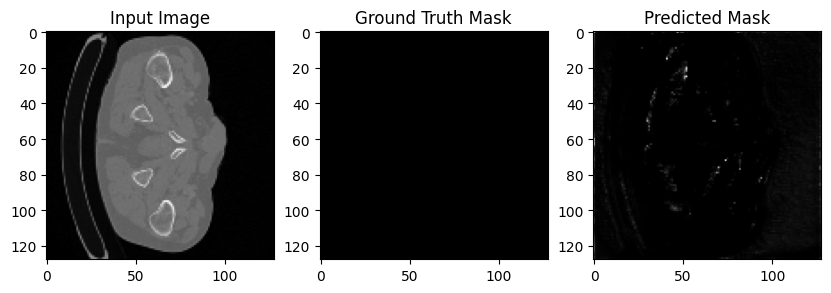

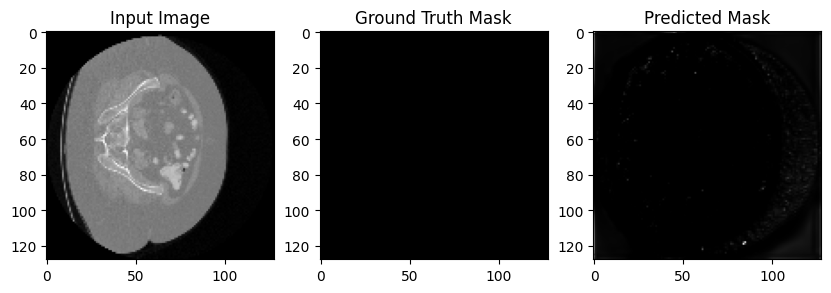

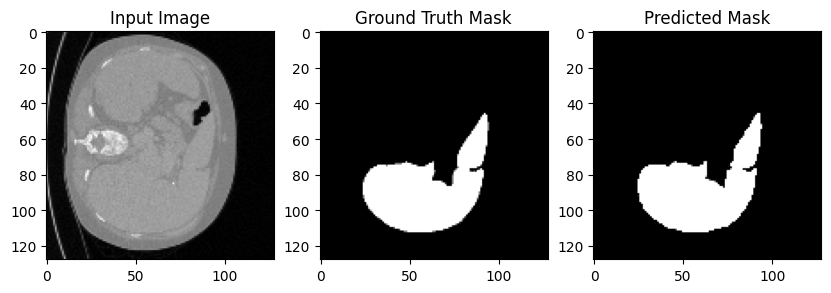

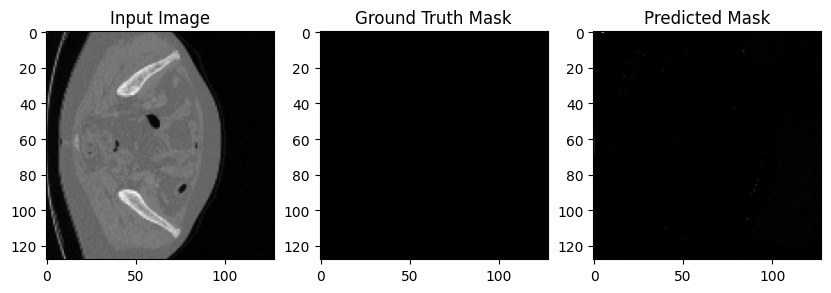

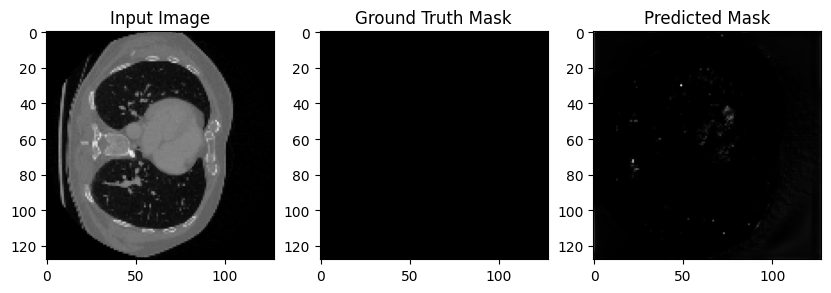

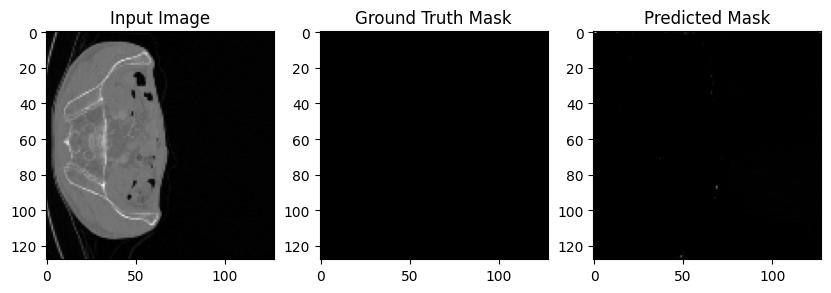

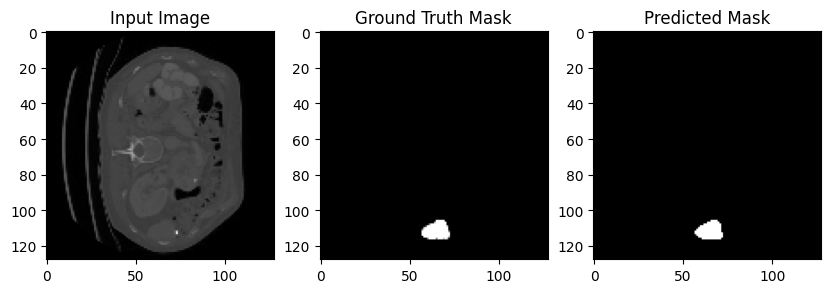

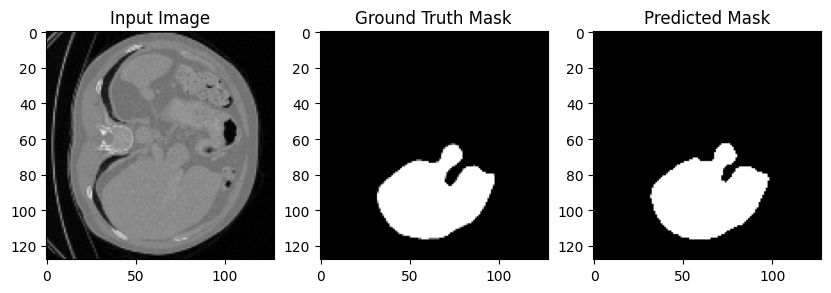

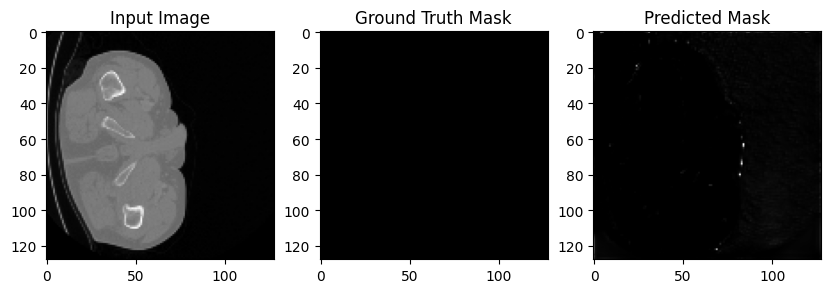

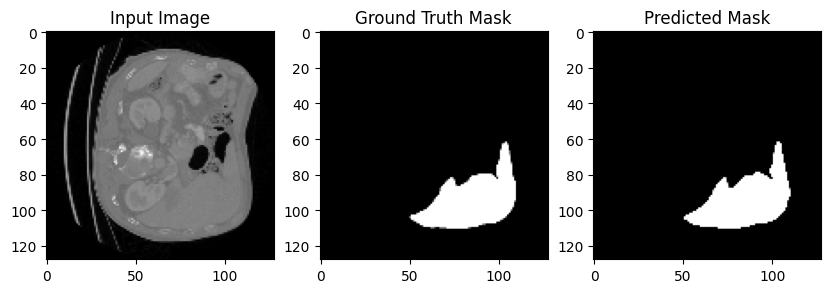

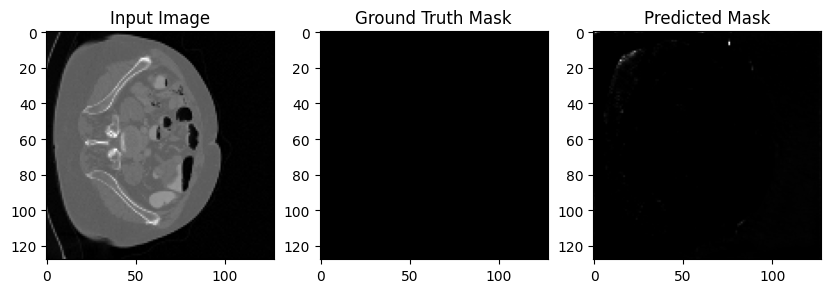

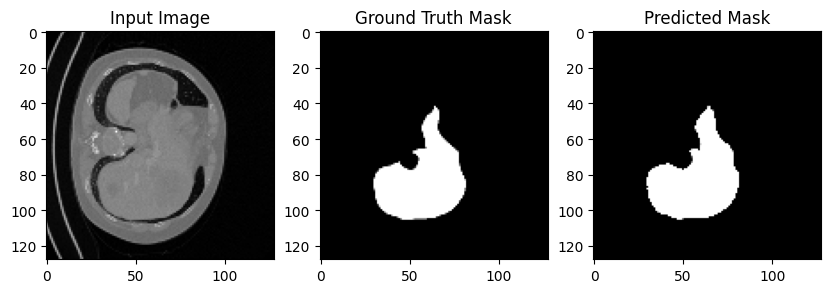

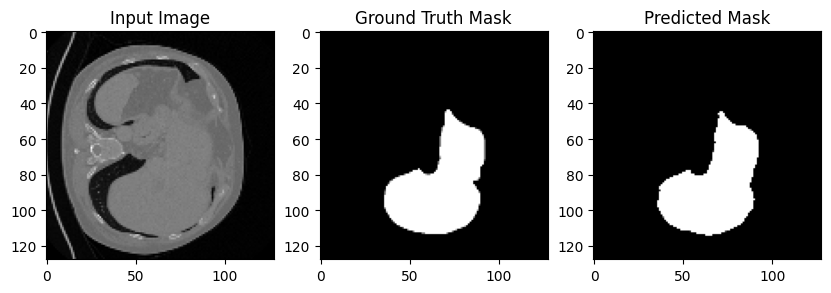

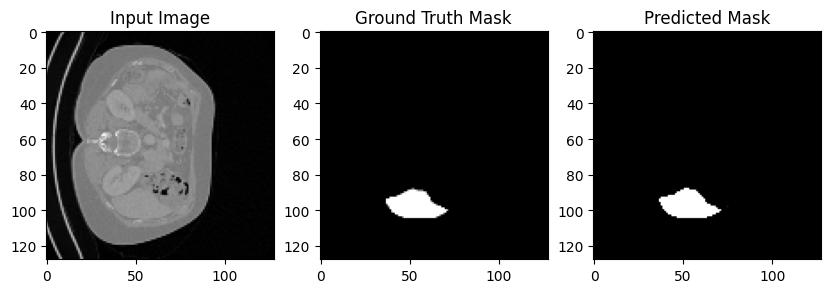

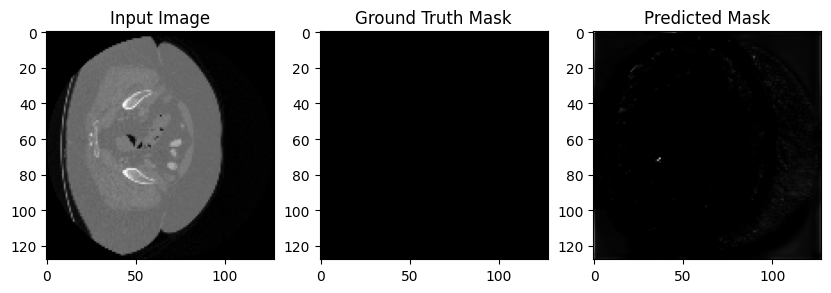

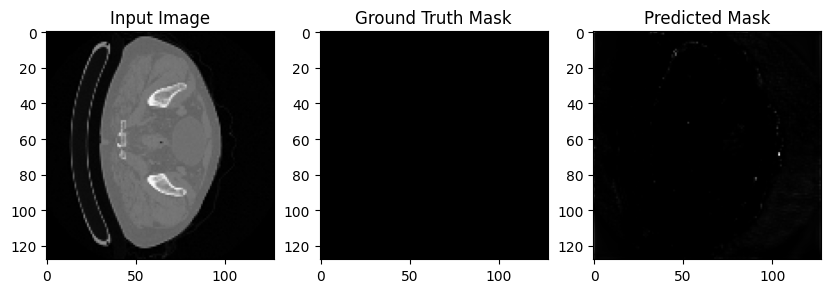

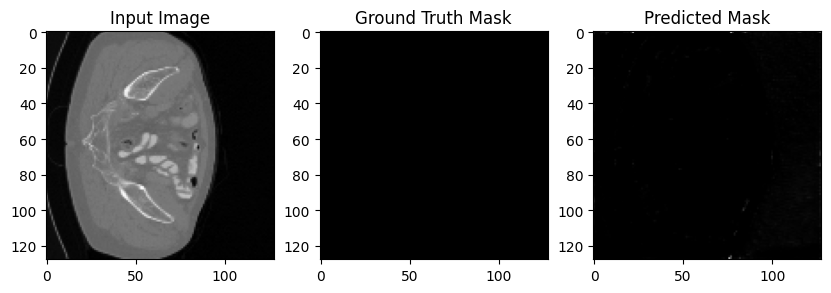

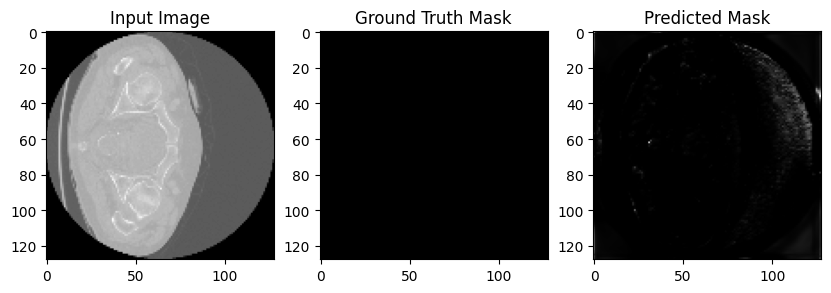

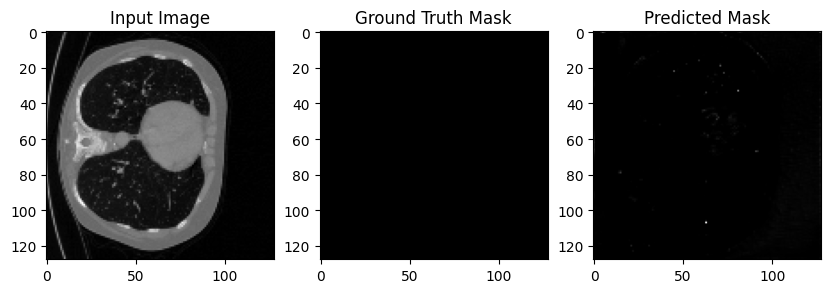

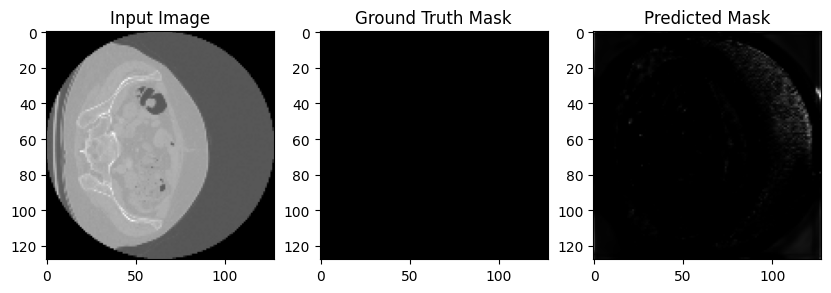

In [11]:
display_predictions(best_model, train_loader, device, 32)

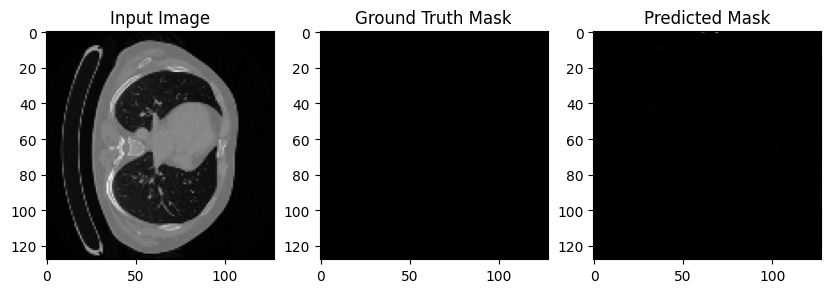

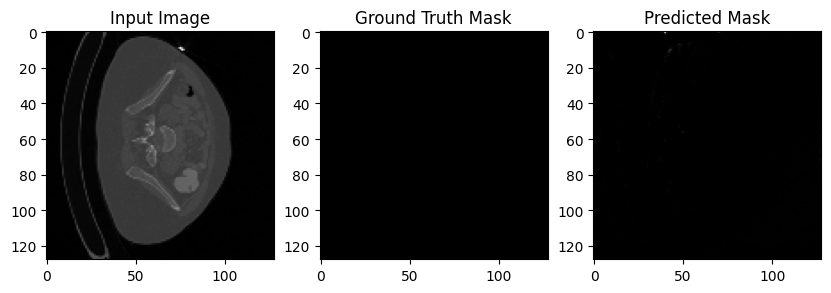

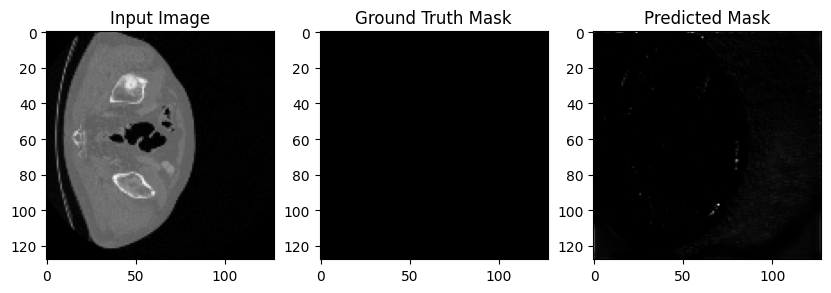

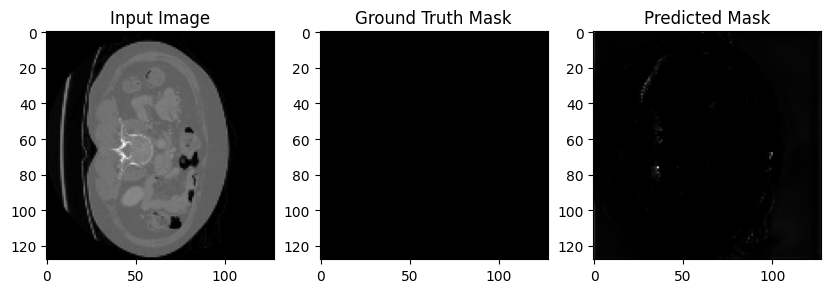

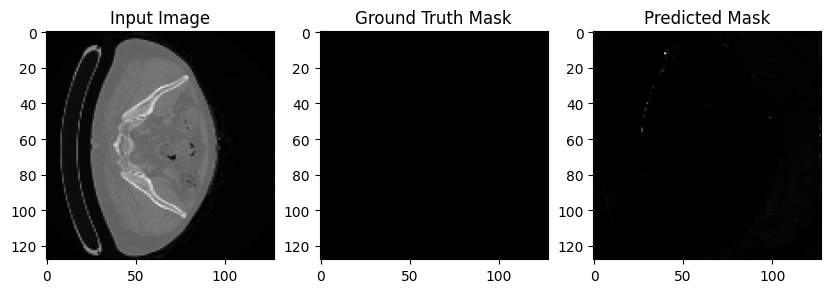

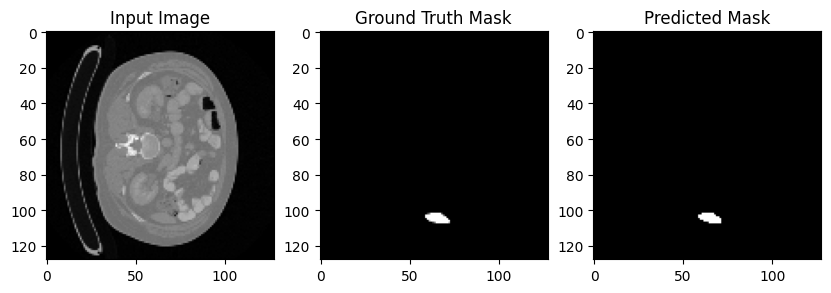

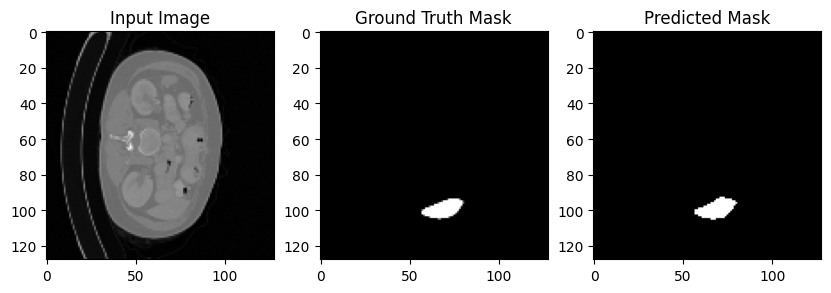

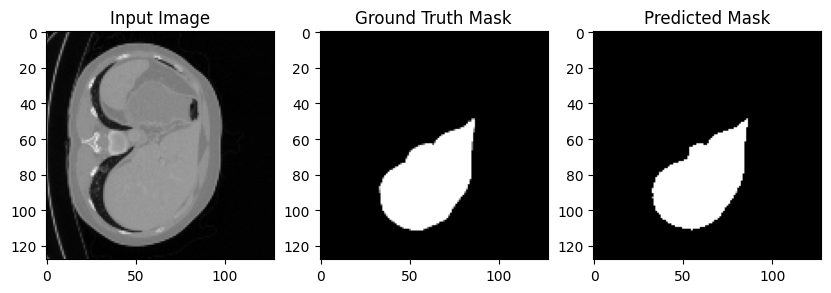

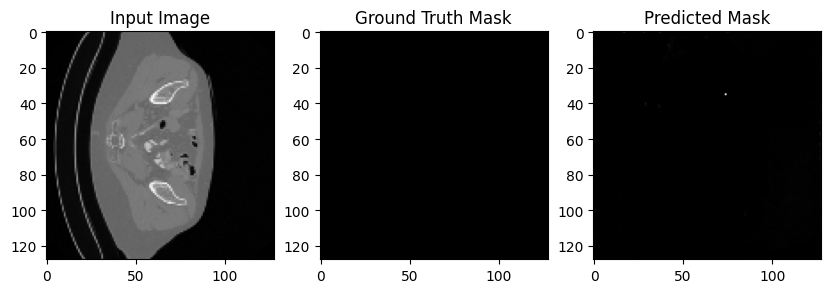

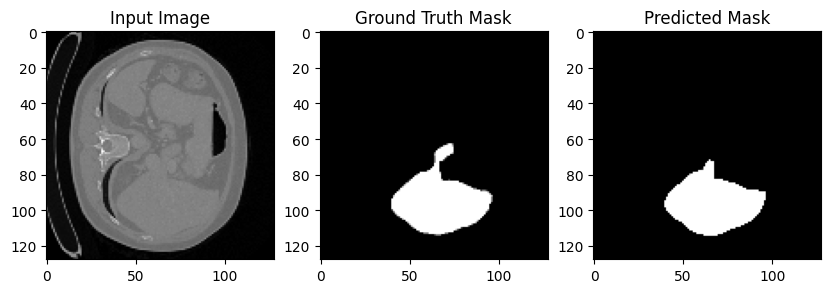

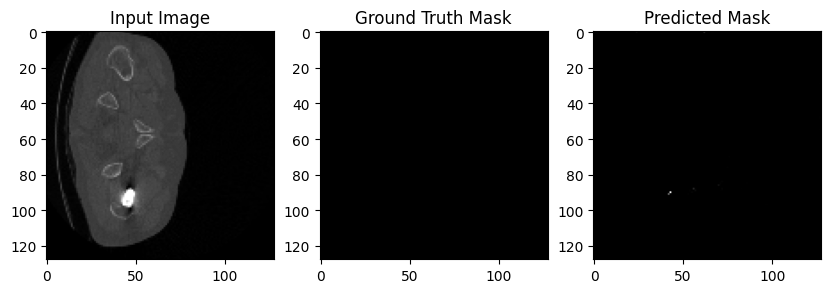

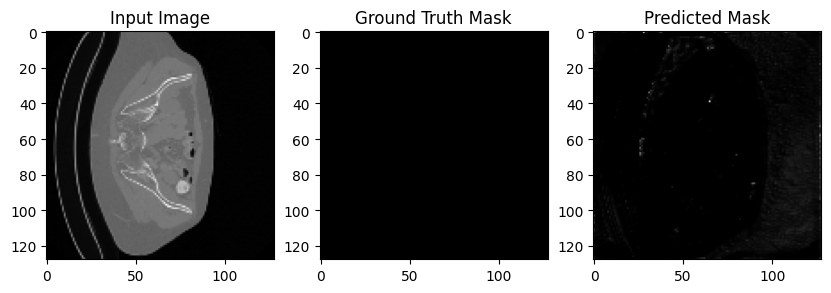

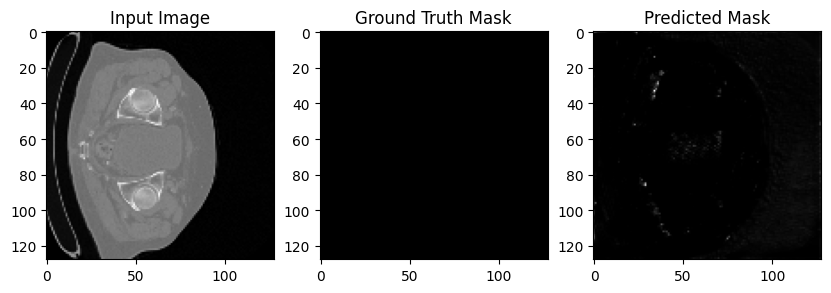

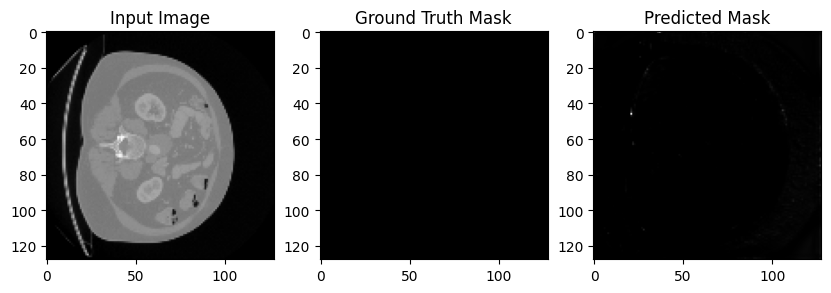

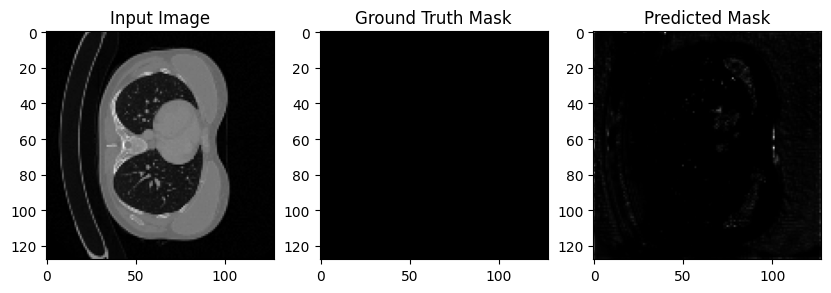

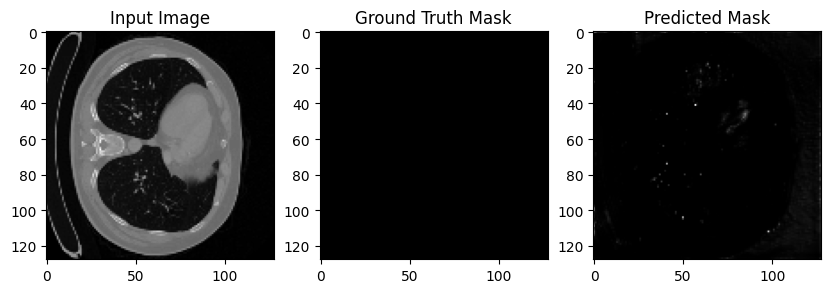

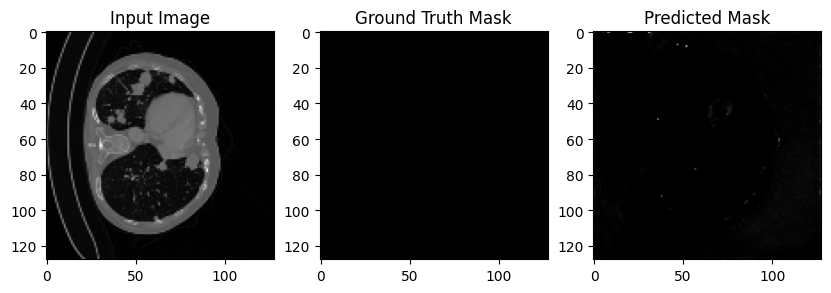

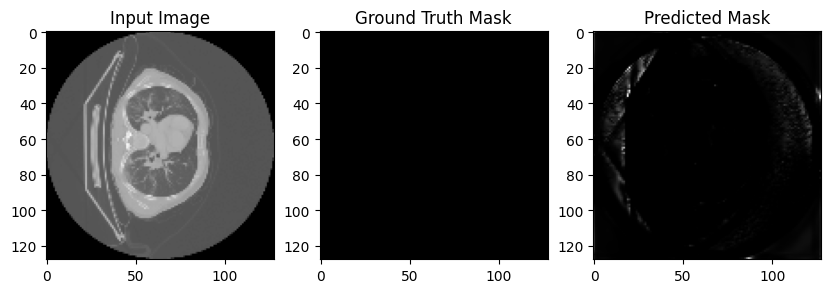

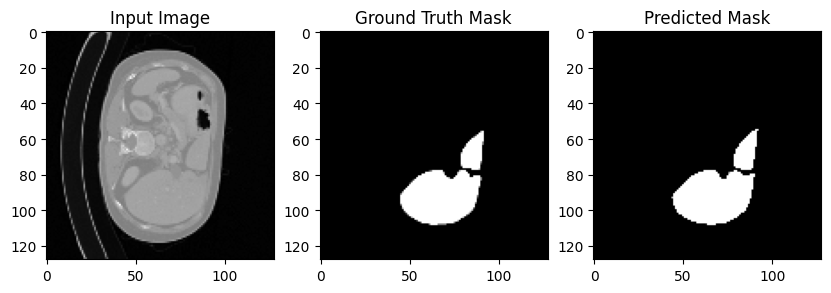

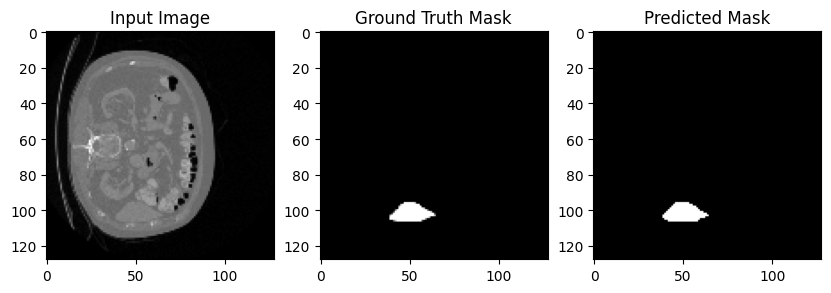

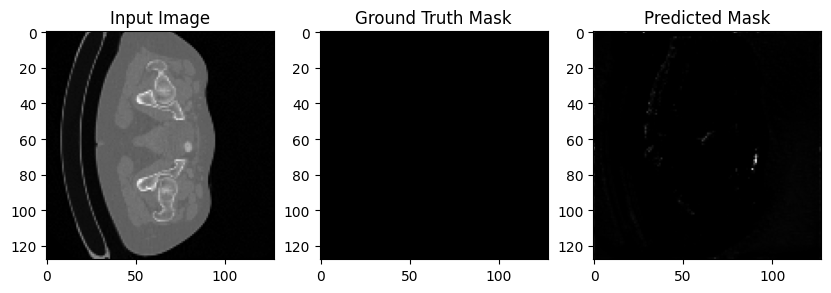

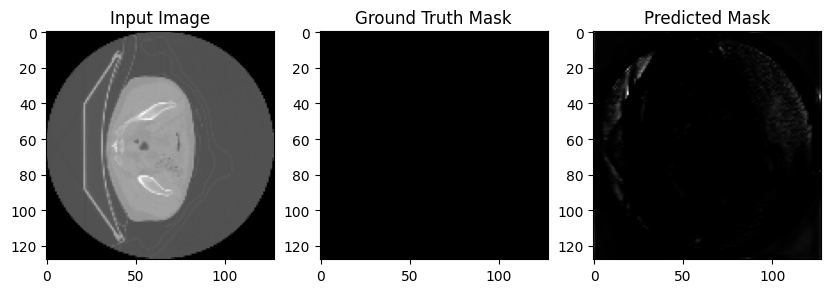

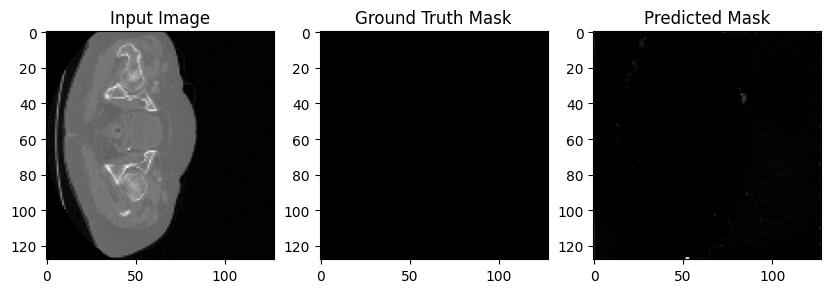

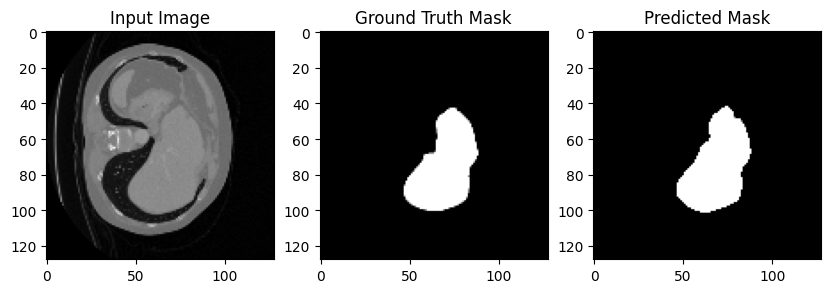

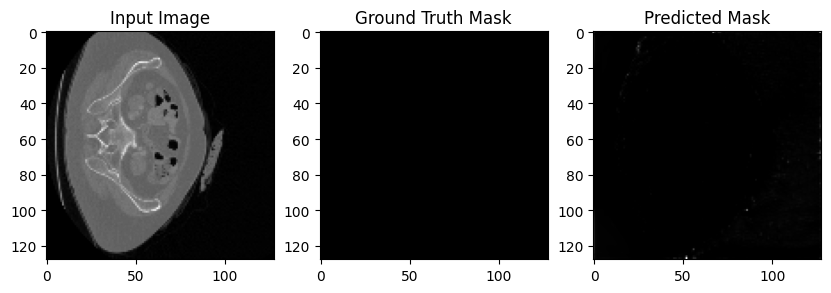

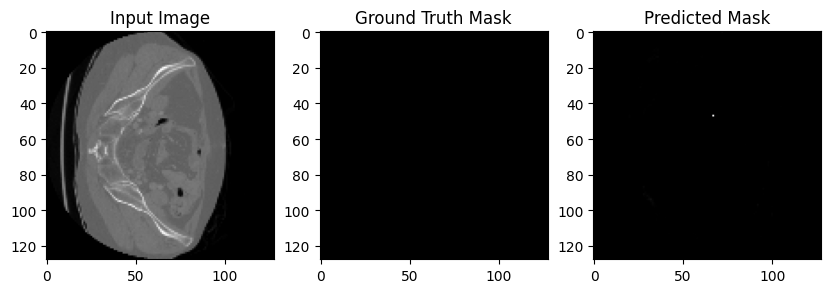

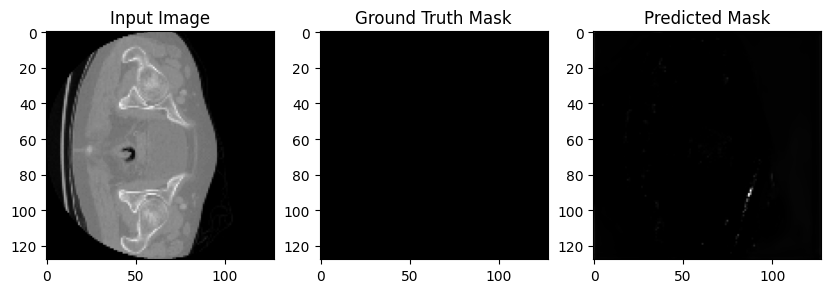

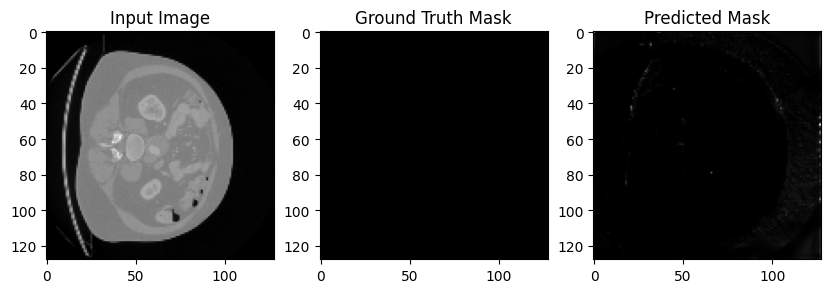

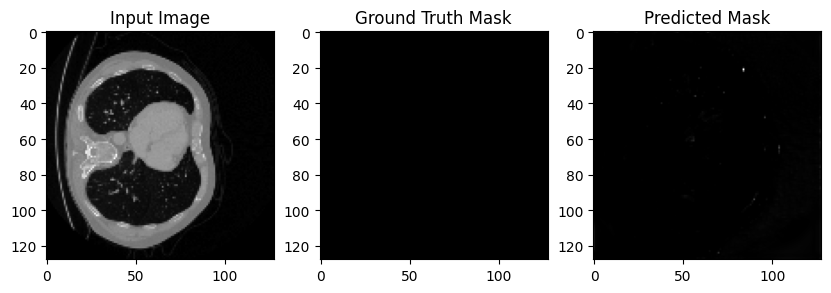

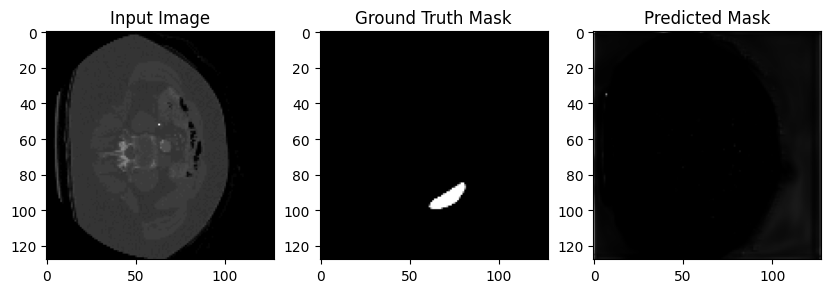

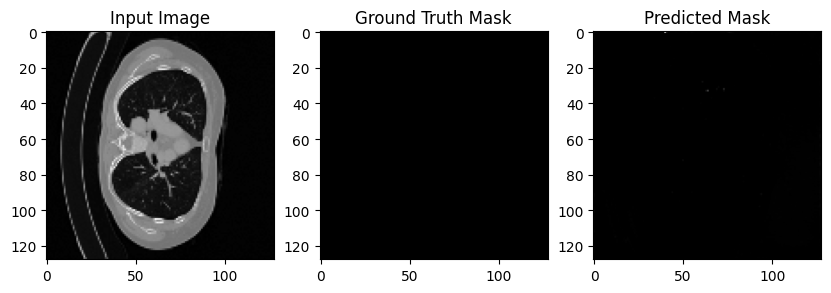

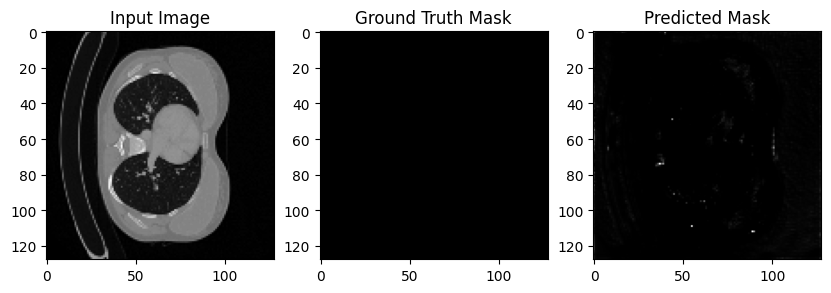

In [12]:
display_predictions(best_model, test_loader, device, 32)